# NSU, vaje 1: osnove strojnega učenja v Pythonu

In [1]:
import numpy as np
import pandas as pd

### A: obdelava podatkov
A.1: Naložite podatke iz CSV datoteke s paketom **pandas**. 

In [2]:
df = pd.read_csv("podatki.csv", index_col = 0)
df

,X1,X2,X3,X4,X5,X6,Y
1,0.452553,69.113756,-2.558555,car,23.210163,NaN,1
2,0.865373,39.855286,-0.727901,bike,24.136736,NaN,0
3,NaN,82.321769,-6.092819,bike,70.441331,937875.790987164,0
4,0.568116,82.638111,-8.248877,car,NaN,197308.828588575,1
5,0.936621,34.460152,-9.577684,NaN,46.773121,253860.316937789,0
...,...,...,...,...,...,...,...
496,0.062005,1.529036,NaN,train,96.551636,NaN,0
497,0.293445,66.051744,8.402215,NaN,83.083566,410337.066976354,0
498,NaN,27.250772,7.462399,train,54.262281,NaN,0
499,NaN,45.993650,NaN,train,84.765766,768879.832467064,0


A.2: Osnovne informacij o podatkih. Izpišite prvih nekaj vrstic podatkov in si jih oglejte, nato pa izpišite še:
- število vrstic in stolpcev
- vrsto spremenljivke v vsakem stolpcu (v pomoč je funkcija **dtypes**), 
- povzetek statistike (pandas nam pomaga z **describe**), 
- število manjkajočih vrednosti v vsakem stolpcu (koristna je funkcija **isnull**).

In [3]:
print(df.head)
st_stolpcev = len(df.columns)
st_vrstic = len(df.index)
print(st_stolpcev, st_vrstic)
print(df.dtypes)
print(df.describe())
df.isnull().sum()

<bound method NDFrame.head of            X1         X2        X3     X4         X5                X6  Y
1    0.452553  69.113756 -2.558555    car  23.210163               NaN  1
2    0.865373  39.855286 -0.727901   bike  24.136736               NaN  0
3         NaN  82.321769 -6.092819   bike  70.441331  937875.790987164  0
4    0.568116  82.638111 -8.248877    car        NaN  197308.828588575  1
5    0.936621  34.460152 -9.577684    NaN  46.773121  253860.316937789  0
..        ...        ...       ...    ...        ...               ... ..
496  0.062005   1.529036       NaN  train  96.551636               NaN  0
497  0.293445  66.051744  8.402215    NaN  83.083566  410337.066976354  0
498       NaN  27.250772  7.462399  train  54.262281               NaN  0
499       NaN  45.993650       NaN  train  84.765766  768879.832467064  0
500  0.815238  36.760951 -5.379489    NaN  18.727611   448788.94998692  1

[500 rows x 7 columns]>
7 500
X1    float64
X2    float64
X3    float64
X4     ob

X1     83
X2     75
X3     99
X4     91
X5     82
X6    134
Y       0
dtype: int64

A.3: Očistite podatke tako, da odpravite manjkajoče vrednosti. Na stolpcih, v katerih manjka manj kot petina vrednosti, izvedete imputacijo manjkajočih vrednosti s povprečjem oziroma najpogostejšo vrednostjo. Stolpce, v katerih manjka več kot petina vrednosti, odstranite.

In [4]:
for column in df:
    if df[column].isnull().sum()/len(df[column]) > 1/5:
        df.drop(column, inplace=True, axis=1)
    elif df[column].dtypes == "float64":
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode()[0])
print(df.head())

         X1         X2        X3    X4         X5  Y
1  0.452553  69.113756 -2.558555   car  23.210163  1
2  0.865373  39.855286 -0.727901  bike  24.136736  0
3  0.480240  82.321769 -6.092819  bike  70.441331  0
4  0.568116  82.638111 -8.248877   car  50.498433  1
5  0.936621  34.460152 -9.577684   car  46.773121  0


A.4: Narišite grafe, ki vam bodo pomagali razumeti značilnosti podatkov:
- histogrami značilk in ciljne spremenljivke (pandas nudi **hist**)
- korelacijska matrika (pandas nudi tudi **corr**)

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>, <Axes: title={'center': 'X5'}>],
       [<Axes: title={'center': 'Y'}>, <Axes: >]], dtype=object)

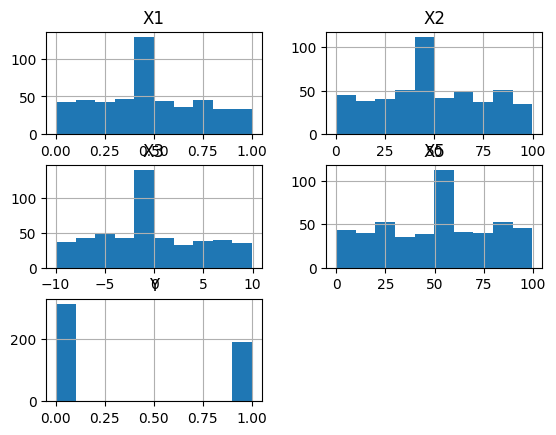

In [6]:
df.hist()

In [7]:
df.corr()

C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_10144\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,X1,X2,X3,X5,Y
X1,1.000000,-0.024074,0.014056,0.022152,-0.007998
X2,-0.024074,1.000000,-0.046150,0.053113,-0.197583
X3,0.014056,-0.046150,1.000000,0.029721,-0.053161
X5,0.022152,0.053113,0.029721,1.000000,-0.031855
Y,-0.007998,-0.197583,-0.053161,-0.031855,1.000000


A.5: V nadaljevanju bomo za strojno učenje uporabljali knjižnico **scikit-learn**, ki ima pomembno omejitev: direktno ne podpira kategoričnih značilk, kot je X4 v naših podatkih. Reši to zagato z uporabo kodirnika **sklearn.preprocessing.OneHotEncoder**.

Kako deluje:
- orodje = .... (nastavitve)
- orodje.fit(podatki)
- podatki2 = orodje.transform(podatki)

skupaj: orodje.fit_transform

In [8]:
from sklearn.preprocessing import OneHotEncoder

# izberemo kategorične stolpce
categorical_cols = df.columns[df.dtypes == "object"]

# ustvarimo encoder za kodiranje
OH_encoder = OneHotEncoder(sparse=False)
# izvedemo kodiranje
OH_cols = OH_encoder.fit_transform(df[categorical_cols])

# sestavimo df z enkodiranimi stolpci namesto originalnih
OH_cols = pd.DataFrame(OH_cols, columns = OH_encoder.get_feature_names_out())
OH_cols.index = df.index
numeric_data = df.drop(categorical_cols, axis = 1)
data = pd.concat([OH_cols, numeric_data], axis=1)

# preverimo
print(data.head())

   X4_bike  X4_car  X4_train        X1         X2        X3         X5  Y
1      0.0     1.0       0.0  0.452553  69.113756 -2.558555  23.210163  1
2      1.0     0.0       0.0  0.865373  39.855286 -0.727901  24.136736  0
3      1.0     0.0       0.0  0.480240  82.321769 -6.092819  70.441331  0
4      0.0     1.0       0.0  0.568116  82.638111 -8.248877  50.498433  1
5      0.0     1.0       0.0  0.936621  34.460152 -9.577684  46.773121  0


c:\Users\Uporabnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### B: Binarna klasifikacija s scikit-learn

B.1: Na celotnih podatkih natreniraj model najbližjih sosedov (**sklearn.neighbors.KNeighborsClassifier**).

In [9]:
from sklearn.neighbors import KNeighborsClassifier

X = data.drop("Y", axis = 1)
y = data["Y"]

# Instanciramo model KNN za k = 2
knn = KNeighborsClassifier(2)
# naučimo model
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=2)

B.2: Izračunaj natančnost modela na učni množici (celotnih podatkih).

In [10]:
from sklearn.metrics import accuracy_score

# napovedi na učni množici
predicted = knn.predict(X)
# knn.predict_proba(X)

acc = accuracy_score(y, predicted)
print(acc)

0.806


In [11]:
# še na roke
sum(predicted == y)/len(y)

0.806

In [12]:
# še na roke po Tinetovo
print(1 - sum(abs(y-predicted)/len(y)))

0.8059999999999998


Pride isto, odlično!

B.3: Ocena na učnih podatkih ni dovolj dobra, saj nam ne zagotavlja, da bo model dobro deloval na novih podatkih. Model lahko preprosto zapomni vse podatke v učni množici, vendar ne bo deloval dobro na novih podatkih. Boljša metoda bi bila, da model preskusimo na novih podatkih. Da oceniš sposobnost generaliziranja, razdeli podatke podatkov na učno in testno množico v razmerju 4:1. Pri tem si lahko pomagaš s funkcijo **sklearn.validation.train_test_split**. 
Potem na novo natreniraj model na učni množici ter izračunaj njegovo natančnost na testni množici.

Opomba: deljenje na učno in testno množico vključuje element naključnosti. Za ponovljive poskuse moramo nastaviti seme naključnega generatorja, npr. **np.random.seed(0)**.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# naučimo model
knn.fit(X_train,y_train)

# preverimo natančnost na testni množici
predicted_2  = knn.predict(X_test)

acc2 = accuracy_score(y_test, predicted_2)
print(acc2)

0.63


B.4: Se ti zdi, da model deluje dobro? 
Metoda najbližjih sosedov je lahko občutljiva na relativne magnitude značilk. Poskusi podatke skalirati z standardno transformacijo $x_i' = \frac{x_i-\bar{x_i}}{\sigma_{x_i}}$. Pomagaš si lahko s **sklearn.preprocessing.StandardScaler**.
Metoda najbližjih sosedov ima tudi en pomemben *hiperparameter*: število sosedov. Nariši graf odvisnosti natančnosti modela (na skaliranih podatkih) v odvisnosti od števila sosedov 1-30. Katero je najboljše?

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

k_seznam = list(range(1,31))
seznam_acc = []
for k in k_seznam:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_scaled,y_train)
    predicted = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, predicted)
    seznam_acc.append(acc)

seznam_acc

[0.7,
 0.69,
 0.65,
 0.65,
 0.67,
 0.69,
 0.71,
 0.72,
 0.75,
 0.72,
 0.71,
 0.72,
 0.68,
 0.71,
 0.7,
 0.75,
 0.72,
 0.73,
 0.7,
 0.75,
 0.71,
 0.73,
 0.73,
 0.75,
 0.72,
 0.73,
 0.72,
 0.77,
 0.76,
 0.74]

Text(0, 0.5, 'Accuracy')

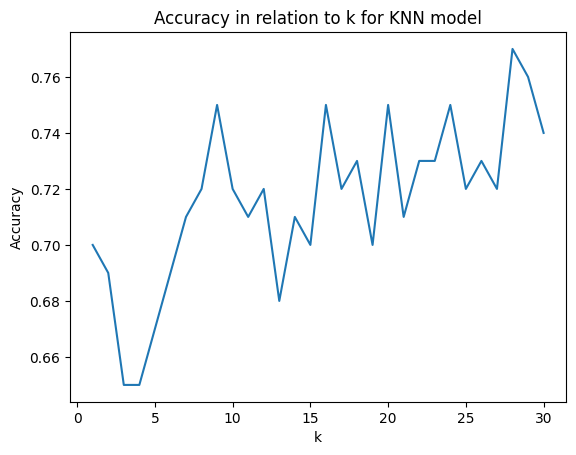

In [15]:
import matplotlib.pyplot as plt
plt.plot(k_seznam, seznam_acc)
plt.title('Accuracy in relation to k for KNN model')
plt.xlabel('k')
plt.ylabel('Accuracy')

Pri KNN manjši kot je k večji bo overfitting - bolje vzeti večji k. V tem primeru bi dober k že bil 8, vendar bi tudi 28 bil čisto ustrezen.

B.5: Natančnost je mera uspešnosti, ki se pogosto uporablja pri klasifikacijskih problemih. V našem primeru imamo poseben primer klasifikacije, pri katerem ima ciljna spremenljivka samo dva razreda: binarna klasifikacija. Kadar je porazdelitev razredov v podatkih neenakomerna, natančnost ni več dobra mera. V takih primerih si pomagamo z matriko zmede (confusion matrix), preciznostjo in priklicem (precision and recall), ROC krivuljo (ROC curve) ter ploščino pod le-to (ROC-AUC). Izpiši vse našteto za KNN z izbranim k (vsaj 10).

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

k = 28
knn = KNeighborsClassifier(k)
knn.fit(X_train_scaled,y_train)
predicted = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, predicted)

conf_mat = confusion_matrix(y_test, predicted)
conf_mat

array([[61,  5],
       [18, 16]], dtype=int64)

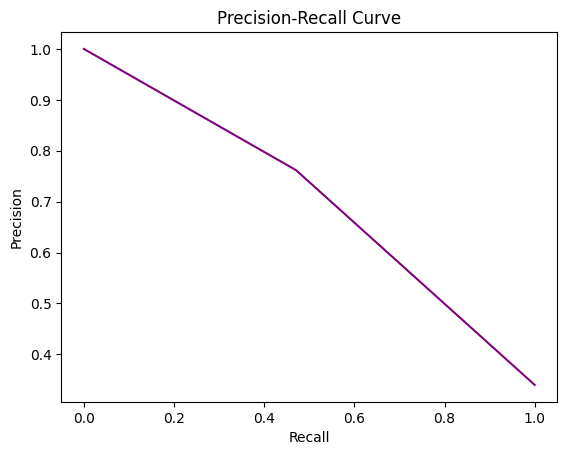

In [17]:
# Izračunamo precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predicted)

# Ustvarimo krivuljo
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

# Dodamo oznake osi
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

# Narišemo krivuljo
plt.show()

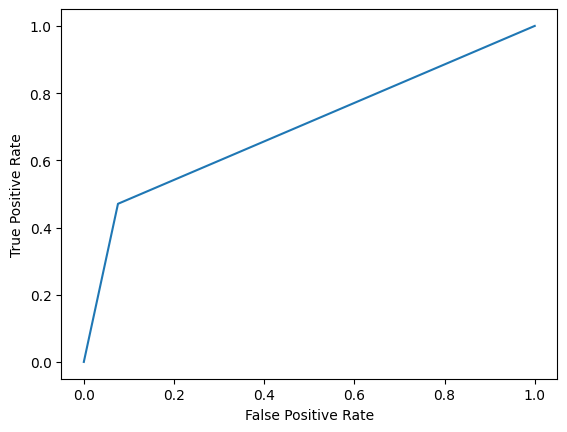

In [18]:
# poračunamo ROC curve
fpr, tpr, _ = roc_curve(y_test,  predicted)

# narišemo ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
roc_auc_score(y_test, predicted)

0.6974153297682709

B.DODATNO: Preizkusi še nekaj drugih metod strojnega učenja, npr. logistično regresijo (**sklearn.linear_model.LogisticRegression**), odločitveno drevo (**sklearn.tree.DecisionTreeClassifier**), naključni gozd (**sklearn.ensemble.RandomForestClassifier**) ter metodo podpornih vektorjev (**sklearn.svm.SVC**).

### C: regresija - napovedovanje numerične ciljne spremenljivke
Za nalogo regresije uporabljamo druge metode strojnega učenja kot za klasifikacijo, vendar pa med njimi pogosto obstajajo analogije.
Drugačne so tudi metrike za računanje napake in uspešnosti modelov. Pri regresiji so koristne metrike MSE, RMSE, $R^2$, NMSE, itd.

C.1: Naloži podatke v datoteki "podatki_regresija.csv". Napovedna spremenljivka se imenuje "target", tokrat so podatki že očiščeni. Nauči model linearne regresije (**sklearn.linear_model.LinearRegression**) ter izračunaj njegov RMSE ter $R^2$.

In [20]:
df2 = pd.read_csv("podatki_regresija.csv")
df2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [21]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

X = df2.drop("target", axis=1)
y = df2["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train,y_train)
predicted = reg.predict(X_test)

# metrike
mse = metrics.mean_squared_error(y_test, predicted)
print("MSE:", mse)
rmse = np.sqrt(mse) # or mse**(0.5) 
print("RMSE:", rmse) 
r2 = metrics.r2_score(y_test,predicted)
print("R^2:", r2)

MSE: 2900.173287883231
RMSE: 53.853256984914395
R^2: 0.4526066021617381


C.2: Delitev na učno in testno množico ni slab pristop, boljšo oceno napake pa lahko pridobimo s prečnim preverjanjem (k-fold cross-validation). Pri tem postopku podatke razdelimo na k (tipično 5 ali 10) enakih delov. Kot učno množico uporabimo vse razen enega dela, ki služi kot testna množica. Ta postopek izvedemo k-krat, pri čemer na vsaki iteraciji za testno množico razglasimo drug del podatkov. Ponavadi na koncu napake povprečimo. Ker pri prečnem preverjanju učimo model k-krat, je lahko ta postopek zamuden, če imamo zelo veliko podatkov in/ali počasno metodo strojnega učenja.

Z metodo 5-kratnega prečnega preverjanja preizkusi vsaj 3 različne metode ter določi, katera je najboljša za naše podatke. Nekaj predlogov: linearna regresija, podporni vektorji (**sklearn.svm.SVR**), naključni gozd (**sklearn.ensemble.RandomForestRegressor**), najbližji sosedi (**sklearn.neighbor.KNeighborsRegressor**). Pomagaš si lahko s funkcijo **sklearn.model_selection.cross_validate** (preprosta) ali **sklearn.model_selection.KFold** (več nadzora).

In [22]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

k = 5
reg = LinearRegression()
svr = SVR()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()

seznam_metod = [reg, svr, rf, knn]
scores_r2 = []
scores_rmse = []

for metoda in seznam_metod:
    score = cross_validate(metoda, X, y, cv=k,
                           scoring = ('r2', 'neg_mean_squared_error'))
    r2 = round(np.mean(score['test_r2']),4)
    rmse = round(np.mean(np.sqrt(np.abs(score['test_neg_mean_squared_error']))),4)
    scores_r2.append(r2)
    scores_rmse.append(rmse)

print(scores_r2)
print(scores_rmse)

[0.4823, 0.1468, 0.43, 0.3765]
[54.6917, 70.4435, 57.4541, 60.1264]


Vidimo lahko, da je tako po metriki R^2 kot po metriki RMSE najbolj natančna metoda za naše podatke linearna regresija, saj ima največji R^2 in najmanjši RMSE.